### KNN
- KNN (K Nearest Neighbors) is an algorithm that can be used for either classification or regression models. In this case, we'll use it for regression.
- Given a value $k$, the algorithm will either:
    - Classification: classify a given vector based on the $k$ nearest vectors. If the majority of neighboring vectors are a particular class, the new vector is labeled as such. Distance is incorporated in the case of a tie-breaker. Optimal values of $k$ are difficult to determine.
    - Regression: the mean of the $Y$ values of the $k$ nearest vectors in the $X$ dimensions is used as the $Y$ value of the given $X$. If there are $n$ dimensions in the data, $k=n$ is typically the best option.
- Pros:
    - Simple
    - Fast
    - We don't need to know anything about the form of our data like with linear and polynomial regression.
- Cons:
    - Doesn't scale great due to the training data remaining in memory
    - Optimal $k$ values are difficult to find for classification uses
    - Great results for interpolation in regression uses, but very bad at extrapolation

In [36]:
from sklearn.neighbors import KNeighborsRegressor

import matplotlib.pyplot as plt
import numpy as np

import datasets.linear
import datasets.poly
import datasets.trig

### Imports
- The imports are very simple for this.
    1. `sklearn.neighbors` is the library used to get the KNN algorithm
    2. `matplotlib.pyplot` is the plotting library that will be used to show results
    3. `numpy` is used for some computations
    4. `datasets.*` is the small collection of programs I made to create random datasets

In [37]:
linear_data = datasets.linear.gen_data(0, 100)
linearvar_data = datasets.linear.gen_data(0, 100, 0.5)

poly_data = datasets.poly.gen_data(0, 100)
polyvar_data = datasets.poly.gen_data(0, 100, 0.5)

trig_data = datasets.trig.gen_data(0, 100)
trigvar_data = datasets.trig.gen_data(0, 100, 0.5)

featureset = np.array([np.array([i]) for i in np.arange(0, 200, 3.67)])
predictions = np.empty(0)

2X + 5
-2X + 0
-5X^4 + -1X^3 + 3X^2 + 5X + 0
5X^4 + 4X^3 + -3X^2 + 5X + 0
-4sin(X) + -3cos(X)
-2sin(X) + -2cos(X)


### Datasets
- Same as all the other regression datasets.

In [38]:
def train_and_plot(model: KNeighborsRegressor, dataset: dict, featureset: np.array) -> np.ndarray:
    model.fit(dataset['X'], dataset['Y'])
    
    predictions = model.predict(featureset)
    
    ax = plt.gca()

    xlim = featureset[-1]
    ax.set_xlim(-xlim, xlim)
    
    ylim1 = abs(max(predictions))
    ylim2 = abs(min(predictions))
    if (ylim1 > ylim2):
        ax.set_ylim(-ylim1, ylim1)
    else:
        ax.set_ylim(-ylim2, ylim2)

    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    
    ax.scatter(dataset['X'], dataset['Y'], c='blue')
    ax.scatter(featureset, predictions, c='red', s=10)
    ax.legend(['Training Data', 'Predicted Data'])
    
    plt.show()
    
    return predictions


### Training
- Same function, just using a new algorithm.

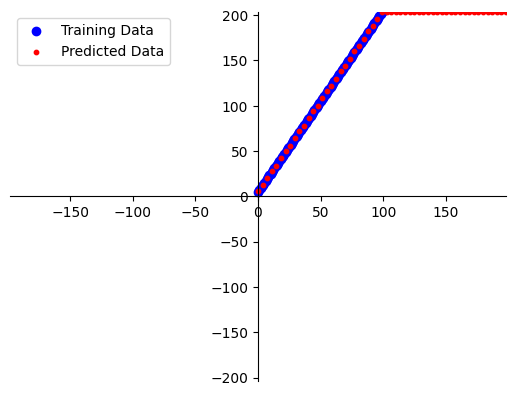

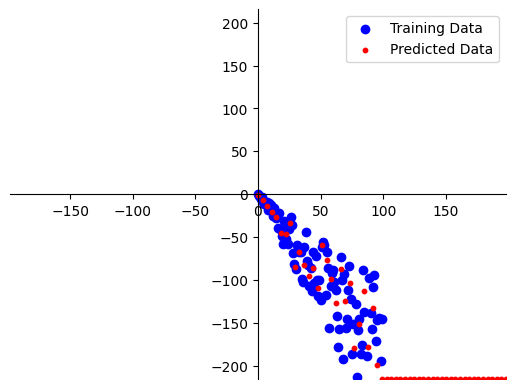

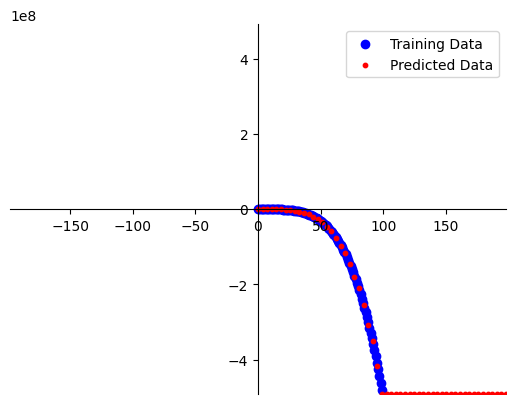

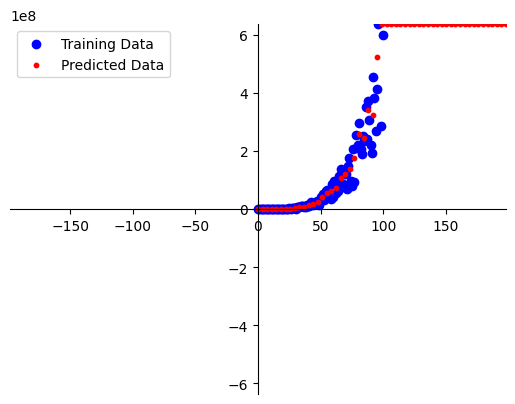

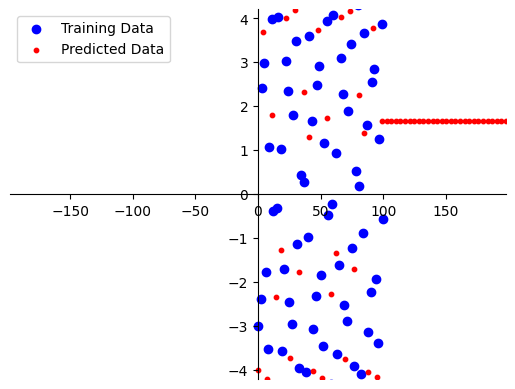

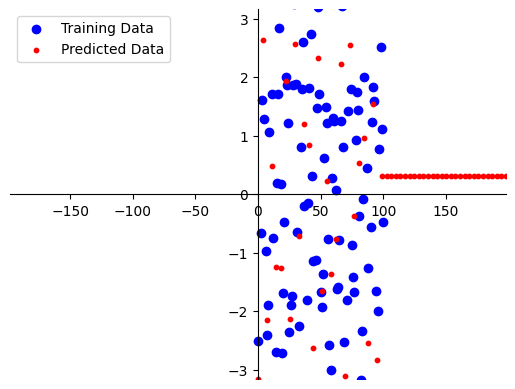

array([-3.15907062,  2.63548468, -2.15768482,  0.48537307, -1.24947025,
       -1.26374498,  1.92898366, -2.12873674,  2.57440768, -0.72261038,
        1.19565131,  0.83453292, -2.62644123,  2.33136458, -1.6462696 ,
        0.22473808, -1.36681552, -0.77081595,  2.22843355, -3.1061524 ,
        2.55226435, -0.37512823,  0.53190331,  0.96473345, -2.54781636,
        1.53936181, -2.83372857,  0.31873518,  0.31873518,  0.31873518,
        0.31873518,  0.31873518,  0.31873518,  0.31873518,  0.31873518,
        0.31873518,  0.31873518,  0.31873518,  0.31873518,  0.31873518,
        0.31873518,  0.31873518,  0.31873518,  0.31873518,  0.31873518,
        0.31873518,  0.31873518,  0.31873518,  0.31873518,  0.31873518,
        0.31873518,  0.31873518,  0.31873518,  0.31873518,  0.31873518])

In [39]:
train_and_plot(KNeighborsRegressor(n_neighbors=2), linear_data, featureset)
train_and_plot(KNeighborsRegressor(n_neighbors=2), linearvar_data, featureset)

train_and_plot(KNeighborsRegressor(n_neighbors=2), poly_data, featureset)
train_and_plot(KNeighborsRegressor(n_neighbors=2), polyvar_data, featureset)

train_and_plot(KNeighborsRegressor(n_neighbors=2), trig_data, featureset)
train_and_plot(KNeighborsRegressor(n_neighbors=2), trigvar_data, featureset)

### Results
- This is the best regression model in terms of range of datasets by a long shot. It performed well for linear, polynomial, and trigonometric data (for interpolation).
- The inclusion of variance introduces variance into the predictions, which may or may not be a good thing.
- Unfortunately, this model is completely useless for extrapolating data. The accuracy of the interpolation is great, but due to the nature of KNN, all values of $X$ outside of the training data will just be the mean of the 2 bordering values.
- To drive home the point behind selecting $k=n$ for $n$-dimensional data, let's take a look at the results with $k=3$.

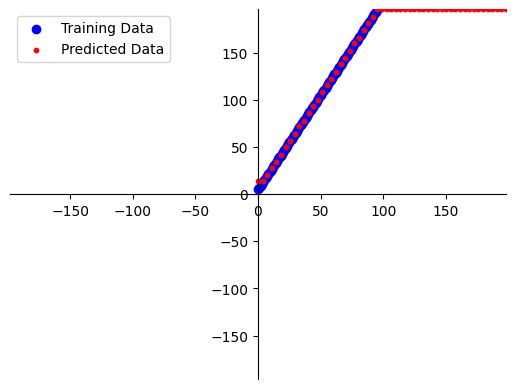

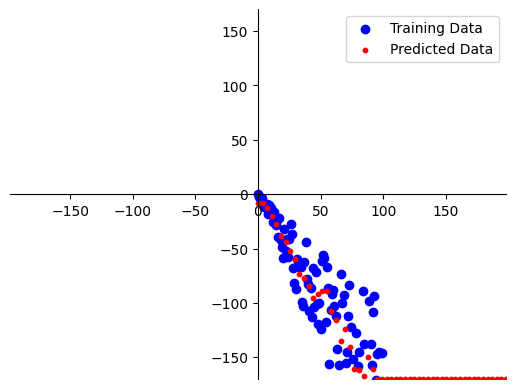

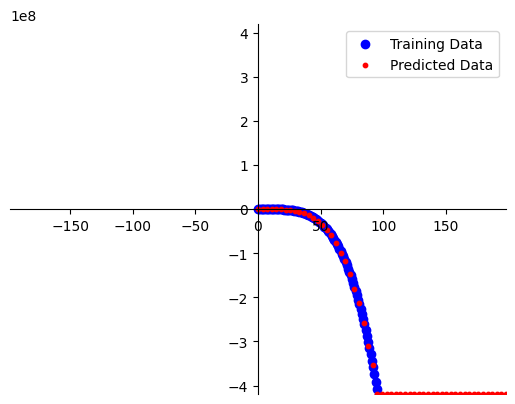

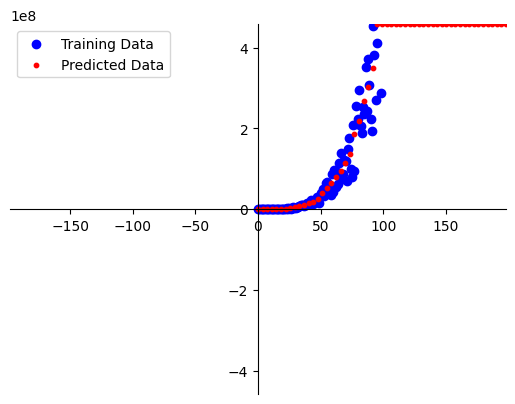

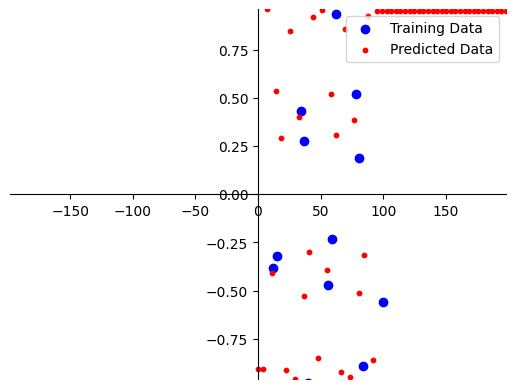

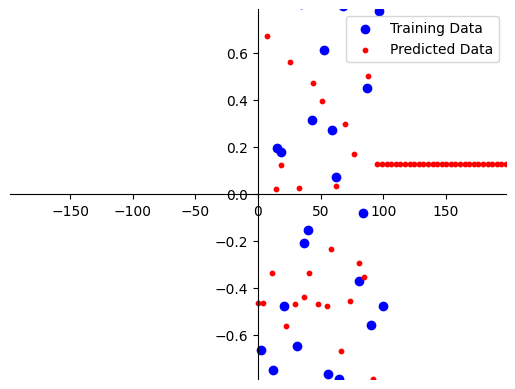

array([-0.46446465, -0.46446465,  0.67287325, -0.33411392,  0.02358817,
        0.12259369, -0.56126679,  0.56183936, -0.46792719,  0.02666671,
       -0.43788052, -0.33314304,  0.47190882, -0.46524989,  0.39724985,
       -0.47398025, -0.23467596,  0.0365316 , -0.6681918 ,  0.29772076,
       -0.45307651,  0.16917917, -0.29424231, -0.3517708 ,  0.50405621,
       -0.78605073,  0.1269564 ,  0.1269564 ,  0.1269564 ,  0.1269564 ,
        0.1269564 ,  0.1269564 ,  0.1269564 ,  0.1269564 ,  0.1269564 ,
        0.1269564 ,  0.1269564 ,  0.1269564 ,  0.1269564 ,  0.1269564 ,
        0.1269564 ,  0.1269564 ,  0.1269564 ,  0.1269564 ,  0.1269564 ,
        0.1269564 ,  0.1269564 ,  0.1269564 ,  0.1269564 ,  0.1269564 ,
        0.1269564 ,  0.1269564 ,  0.1269564 ,  0.1269564 ,  0.1269564 ])

In [41]:
train_and_plot(KNeighborsRegressor(n_neighbors=10), linear_data, featureset)
train_and_plot(KNeighborsRegressor(n_neighbors=10), linearvar_data, featureset)

train_and_plot(KNeighborsRegressor(n_neighbors=10), poly_data, featureset)
train_and_plot(KNeighborsRegressor(n_neighbors=10), polyvar_data, featureset)

train_and_plot(KNeighborsRegressor(n_neighbors=10), trig_data, featureset)
train_and_plot(KNeighborsRegressor(n_neighbors=10), trigvar_data, featureset)

### Results
- These are some very interesting findings!
- Increasing the value to $k=10$ was highly effective in linear and polynomial datasets for removing the effects of variance in predictions. It essentially made the model generate results much closer to polynomial and linear regression, but generalized to fit the dataset.
- Unfortunately, this destroyed the results for trigonometric data. This makes sense, because as the value of $k$ increases, the more "confused" the model will get by the oscillating values. 
- If $k$ is increased to the size of the training data, we will see that all predictions are just the mean.

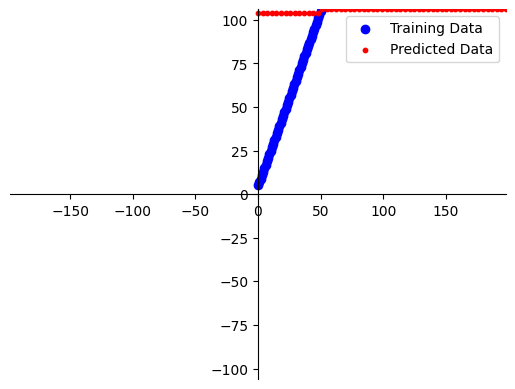

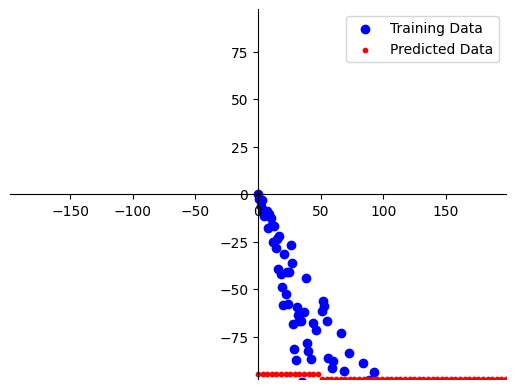

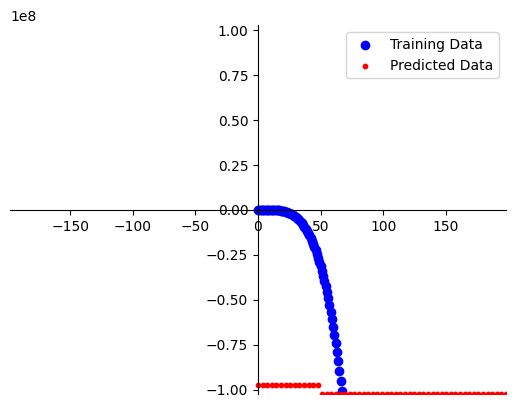

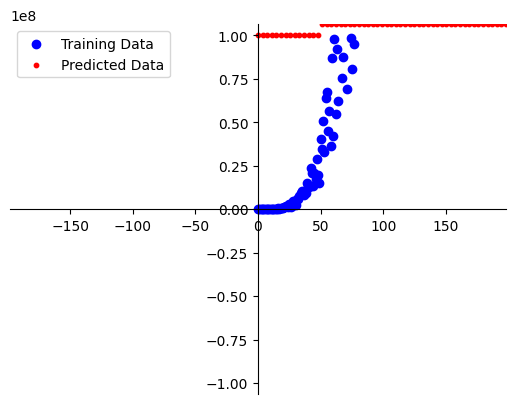

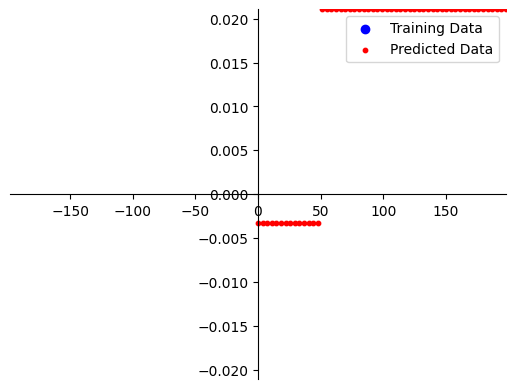

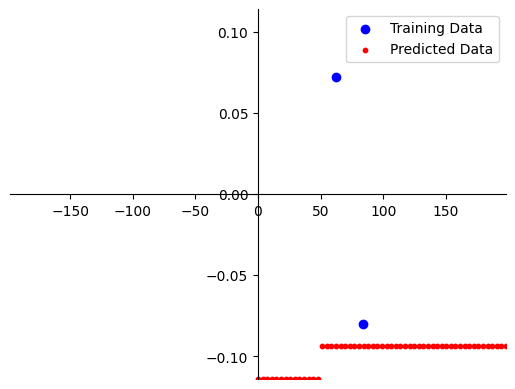

array([-0.11386418, -0.11386418, -0.11386418, -0.11386418, -0.11386418,
       -0.11386418, -0.11386418, -0.11386418, -0.11386418, -0.11386418,
       -0.11386418, -0.11386418, -0.11386418, -0.11386418, -0.09346462,
       -0.09346462, -0.09346462, -0.09346462, -0.09346462, -0.09346462,
       -0.09346462, -0.09346462, -0.09346462, -0.09346462, -0.09346462,
       -0.09346462, -0.09346462, -0.09346462, -0.09346462, -0.09346462,
       -0.09346462, -0.09346462, -0.09346462, -0.09346462, -0.09346462,
       -0.09346462, -0.09346462, -0.09346462, -0.09346462, -0.09346462,
       -0.09346462, -0.09346462, -0.09346462, -0.09346462, -0.09346462,
       -0.09346462, -0.09346462, -0.09346462, -0.09346462, -0.09346462,
       -0.09346462, -0.09346462, -0.09346462, -0.09346462, -0.09346462])

In [42]:
train_and_plot(KNeighborsRegressor(n_neighbors=100), linear_data, featureset)
train_and_plot(KNeighborsRegressor(n_neighbors=100), linearvar_data, featureset)

train_and_plot(KNeighborsRegressor(n_neighbors=100), poly_data, featureset)
train_and_plot(KNeighborsRegressor(n_neighbors=100), polyvar_data, featureset)

train_and_plot(KNeighborsRegressor(n_neighbors=100), trig_data, featureset)
train_and_plot(KNeighborsRegressor(n_neighbors=100), trigvar_data, featureset)

### Results
- The graphs here are slightly cut off, but we can see numerically that the hypothesis is correct. Trigonometric functions have all predictions very close to 0, and linear and polynomial functions have all predictions at sensible values for their means.